# **P0:SIMPLE MODEL WITH KERAS**

BY SARA MICOL FERRAINA, ALEXANDRE DE NYS, SZYMON BARTANOWICZ

**POINT ONE**

In [1]:
!pip uninstall tensorflow
!pip install tensorflow==2.15.0



Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.15.0
  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.

**LOAD LIBRARIES**

In [2]:
import csv
import tensorflow as tf
from tensorflow.keras.utils import get_file
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Model

**DATA LOADING**

In [36]:

path ="/content/Womens Clothing E-Commerce Reviews.csv"

with open(path, newline='') as f:  # Usa stringa vuota per newline
    reader = csv.reader(f)
    data = list(reader)


**DATA PREPARATION**

In [37]:
import csv

path = "/content/Womens Clothing E-Commerce Reviews.csv"

# Classification function
def classify(value):
    if value in ['1', '2']:
        return "Negative"
    elif value == '3':
        return "Neutral"
    elif value in ['4', '5']:
        return "Positive"
    return "Unknown"

# Open the file and process the content
with open(path, newline='', encoding='utf-8') as f:
    reader = csv.reader(f)

    # Skip the first row
    next(reader)

    # Extract only columns 3 and 4 and concatenate if the third column is not empty
    concatenated_data = []
    classifications = []

    for row in reader:
        if row[0].strip():  # Check if the first column is not empty
            concatenated_entry = f"{row[3]} {row[4]}"
            concatenated_data.append(concatenated_entry)
            classification = classify(row[5].strip())  # Classify the value in the fifth column
            classifications.append(classification)

# Display filtered data
# This was done just to check if it was correct
if concatenated_data:  # Check if there is data
    print(f"{concatenated_data[0]} - {classifications[0]}")  # Print only the first row

# DATA SPLITTING

# Convert to NumPy arrays
X = np.array(concatenated_data)
y = np.array(classifications)

# Manual dataset splitting
# test also corresponds to training
split_index = int(18000)  # 80% for training
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

# Display the results, only the first row of each
print("X_train:", X_train[2])
print("y_train:", y_train[2])
print("X_test:", X_test[0])
print("y_test:", y_test[0])



 Absolutely wonderful - silky and sexy and comfortable - Positive
X_train: Some major design flaws I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
y_train: Neutral
X_test: Unique These culottes are fun. i bought the neutral color with the black stripes in xs. in my opinion, they run big. i am usually a small (4-6), 31" waist, 38" hips. pleats at the hip and low waist area are not always my friend, but with a longer tank or shirt, they looked fine. the fabric moves in a graceful way and these culottes can be dressed up or down. so far, wrinkl

**POINT 2**

**PERCEPTRON WITH** **TOKENIZER**

**CONVERTING X**

In [38]:
# Set the maximum number of words in the vocabulary (you can adjust this if needed)
vocab_size = 1000
# You can change this value based on your data

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)

# Fit the Tokenizer to the training data (X_train)
tokenizer.fit_on_texts(X_train)

# Transform the training reviews into a binary matrix
X_train_binary = tokenizer.texts_to_matrix(X_train, mode='binary')

# Transform the test reviews into a binary matrix
X_test_binary = tokenizer.texts_to_matrix(X_test, mode='binary')

# Display the dimensions of the resulting matrices and an example
print("X_train_binary shape:", X_train_binary.shape)
print("X_test_binary shape:", X_test_binary.shape)
print("Example X_train_binary[0]:", X_train_binary[0])
print("Example X_test_binary[0]:", X_test_binary[0])



X_train_binary shape: (18000, 1000)
X_test_binary shape: (5486, 1000)
Example X_train_binary[0]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.

**CONVERTING Y**

    Label Mapping: We first map the string labels to integers: "Negative" → 0, "Neutrale" → 1, "Positive" → 2.
    to_categorical: This function converts the mapped labels into one-hot encoded vectors where:
        0 → [1, 0, 0]
        1 → [0, 1, 0]
        2 → [0, 0, 1]

This will prepare the labels for training with categorical_crossentropy.

In [39]:
# Step 1: Create a mapping for the labels
label_map = {"Negative": 0, "Neutral": 1, "Positive": 2}

# Step 2: Map the string labels in y_train and y_test to integers
y_train_mapped = np.array([label_map[label] for label in y_train])
y_test_mapped = np.array([label_map[label] for label in y_test])

# Step 3: Convert the integer labels to one-hot encoded vectors
y_train_categorical = to_categorical(y_train_mapped, num_classes=3)
y_test_categorical = to_categorical(y_test_mapped, num_classes=3)

# Step 4: Verify the result
print("y_train_categorical shape:", y_train_categorical.shape)
print("y_test_categorical shape:", y_test_categorical.shape)
print("Example y_train_categorical[0]:", y_train_categorical[0])
print("Example y_test_categorical[0]:", y_test_categorical[0])

y_train_categorical shape: (18000, 3)
y_test_categorical shape: (5486, 3)
Example y_train_categorical[0]: [0. 0. 1.]
Example y_test_categorical[0]: [0. 0. 1.]


**FIRST MODEL ARCHITECTURE**

Following this table we know that since our problem is a multiclass, single-label classification we have to use a softmax for the last layer activation function and the categorical_crossentropy as loss function.

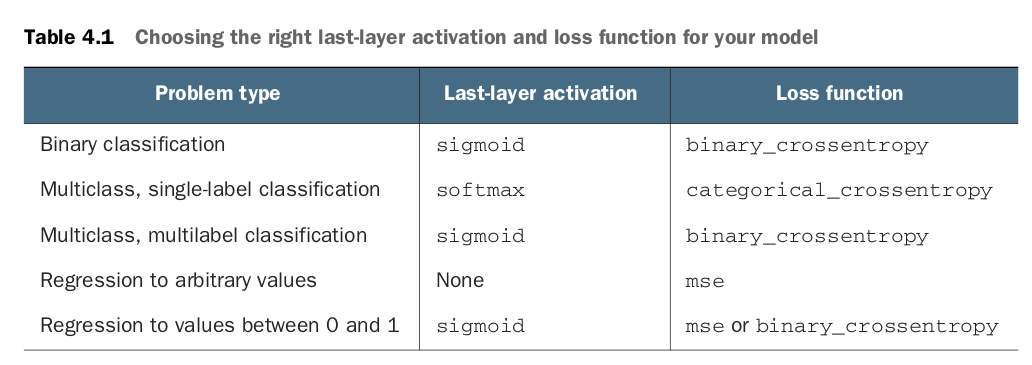

explanation number of parameters
input layer
(input_shape + 1) * units.
initial input = dim of vocabulary

In [40]:
# Number of input features is the size of the vocabulary (vocab_size)
input_shape = vocab_size

# Number of classes (for output layer) is 3 (Negative, Neutral, Positive)
num_classes = 3

# Create a Sequential model
model = Sequential()

# 1. Input Layer (size of the vocabulary from the tokenizer)
# Hidden Layer with appropriate number of units and ReLU activation
model.add(Dense(units=128, activation='relu', input_shape=(input_shape,), name='input_layer1'))

# 2. First Hidden Layer with 64 units and ReLU activation
model.add(Dense(units=64, activation='relu', name='hidden_layer_1'))

# 3. Second Hidden Layer with 32 units and ReLU activation (additional layer)
model.add(Dense(units=32, activation='relu', name='hidden_layer_2'))

# 4. Output Layer with 3 units (for the 3 classes) and softmax activation
model.add(Dense(units=num_classes, activation='softmax', name='output_layer'))

# Compile the model with categorical crossentropy loss and an optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

x_val = X_train_binary[:10000]  # The first 10,000 samples are used for validation
partial_x_train = X_train_binary[10000:]  # The remaining data is used for training

y_val = y_train_categorical[:10000]  # The labels corresponding to the validation data
partial_y_train = y_train_categorical[10000:]  # The labels for training

# Model training
history = model.fit(
    partial_x_train,  # Partial training data
    partial_y_train,  # Corresponding labels
    epochs=10,        # Number of epochs
    batch_size=512,   # Batch size
    validation_data=(x_val, y_val)  # Validation data
)

# Model evaluation on the test data
loss, accuracy = model.evaluate(X_test_binary , y_test_categorical)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 128)               128128    
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                8256      
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 138563 (541.26 KB)
Trainable params: 138563 (541.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
16/16 [==============================] - 1s 24ms/step - loss: 0.8184 - accuracy: 0.7146 - val_loss: 0.6868 - val_accuracy: 0.7756
Epoc

**QUESTION 1: Does the validation accuracy grow with each epoch ?**
 It grows steadily for the first 5 epochs then stabilises around a value of 0.81

**POINT 3**

**PERCEPTRON WITH A TEXTVECTORIZER LAYER**

**SECOND MODEL ARCHITECTURE**

I had previously converted Y with one-hot encoding, but with sparse_categorical_crossentropy I cannot use one-hot encoded vectors so I have to revert to the original label assignments.
‘Negative’ → 0
‘Neutral’ → 1
‘Positive’ → 2

In [41]:
# Create a mapping for the labels
label_map = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
}

# Map the string labels in y_train and y_test to integers
# Use a list comprehension to perform the mapping
y_train_mapped = np.array([label_map[label] for label in y_train])
y_test_mapped = np.array([label_map[label] for label in y_test])

# Verify the result
print("y_train_mapped shape:", y_train_mapped.shape)  # Display the shape of the training labels
print("y_test_mapped shape:", y_test_mapped.shape)    # Display the shape of the test labels
print("Example y_train_mapped[0]:", y_train_mapped[0])  # Display the first mapped training label
print("Example y_test_mapped[0]:", y_test_mapped[0])    # Display the first mapped test label

# Define the vocabulary size and the fixed length for sequences
vocab_size = 1000  # Maximum number of tokens
output_sequence_length = 100  # Maximum length of the output sequences from the vectorizer

# Create a separate TextVectorization layer
vectorizer = TextVectorization(max_tokens=vocab_size, output_mode='multi_hot')

# Adapt the TextVectorization layer to the training data
vectorizer.adapt(X_train)  # X_train must be a list of strings

# Create a sequential model
model = Sequential()

# Add an explicit input layer for strings
model.add(Input(shape=(1,), dtype=tf.string))  # Input layer that accepts strings

# Add the TextVectorization layer as the first layer of the model
model.add(vectorizer)

# Add the first hidden layer with 64 units and ReLU activation
model.add(Dense(units=64, activation='relu'))

# Add the second hidden layer with 32 units and ReLU activation
model.add(Dense(units=32, activation='relu'))

# Add the output layer with 3 units and softmax activation (for 3 classes)
model.add(Dense(units=3, activation='softmax'))

# Compile the model with sparse categorical crossentropy and Adam optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

x_val = X_train[:10000]  # The first 10,000 samples are used for validation
partial_x_train = X_train[10000:]  # The remaining data is used for training

y_val = y_train_mapped[:10000]  # The labels corresponding to the validation data
partial_y_train = y_train_mapped[10000:]  # The labels for training

# Train the model
history = model.fit(
    partial_x_train,  # Partial training data
    partial_y_train,  # Corresponding labels
    epochs=10,        # Number of epochs
    batch_size=512,   # Batch size
    validation_data=(x_val, y_val)  # Validation data
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test , y_test_mapped)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")




y_train_mapped shape: (18000,)
y_test_mapped shape: (5486,)
Example y_train_mapped[0]: 2
Example y_test_mapped[0]: 2
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_14 (Tex  (None, 1000)              0         
 tVectorization)                                                 
                                                                 
 dense_42 (Dense)            (None, 64)                64064     
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 3)                 99        
                                                                 
Total params: 66243 (258.76 KB)
Trainable params: 66243 (258.76 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________

**QUESTION 2**
Is the new model any better than the previous one ?
The accuracy of the two models is more or less the same. However, the loss decreases significantly.

**PUNTO 4**

**CNN con TextVectorizer layer and word embeddings**

**THIRD MODEL ARCHITECTURE**

**COMMENTS:**

I modified the format of Y to be compatible with Categorical Crossentropy; in fact, the conversion of labels to one-hot encoded format is necessary.

In [42]:
# Create a mapping for the labels
label_map = {"Negative": 0, "Neutral": 1, "Positive": 2}

# Map the string labels in y_train and y_test to integers
y_train_mapped = np.array([label_map[label] for label in y_train])
y_test_mapped = np.array([label_map[label] for label in y_test])

# Convert the integer labels to one-hot encoded vectors
y_train_categorical = to_categorical(y_train_mapped, num_classes=3)
y_test_categorical = to_categorical(y_test_mapped, num_classes=3)

# Verify the result
print("y_train_categorical shape:", y_train_categorical.shape)
print("y_test_categorical shape:", y_test_categorical.shape)
print("Example y_train_categorical[0]:", y_train_categorical[0])
print("Example y_test_categorical[0]:", y_test_categorical[0])


# Configuration parameters
max_tokens = 10000  # Maximum vocabulary size
output_sequence_length = 100  # Fixed length for sequences
embedding_dim = 60  # Embedding dimension
num_classes = 3  # Number of classes in the multi-class classifier

# Define the input layer
inputs = Input(shape=(1,), dtype=tf.string, name='text_input')

# Define the TextVectorization layer
vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=output_sequence_length
)

# Adapt the TextVectorization layer to the training data
vectorizer.adapt(X_train)  # Adapt using the training data

# Apply the TextVectorization layer to the input
x = vectorizer(inputs)

# Define the Embedding layer
embedding_layer = Embedding(
    input_dim=max_tokens,
    output_dim=embedding_dim
)

# Apply the Embedding layer
x = embedding_layer(x)

# Add two Conv1D layers
x = Conv1D(filters=64, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)

# Add a GlobalMaxPooling1D layer
x = GlobalMaxPooling1D()(x)

# Add two Dense layers
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# Define the output layer with softmax activation for multi-class classification
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Build the final model using the functional API
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with categorical_crossentropy for multi-class classification
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
# Split the training data into partial training and validation sets
x_val = X_train[:10000]  # First 10,000 samples for validation
partial_x_train = X_train[10000:]  # Remaining data for training

y_val = y_train_categorical[:10000]  # Corresponding labels for validation
partial_y_train = y_train_categorical[10000:]  # Remaining labels for training

history = model.fit(
    partial_x_train,  # Partial training data
    partial_y_train,  # Corresponding labels
    epochs=10,        # Number of epochs
    batch_size=512,   # Batch size
    validation_data=(x_val, y_val)  # Validation data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


y_train_categorical shape: (18000, 3)
y_test_categorical shape: (5486, 3)
Example y_train_categorical[0]: [0. 0. 1.]
Example y_test_categorical[0]: [0. 0. 1.]
Epoch 1/10
16/16 [==============================] - 8s 437ms/step - loss: 0.9146 - accuracy: 0.7290 - val_loss: 0.7469 - val_accuracy: 0.7756
Epoch 2/10
16/16 [==============================] - 7s 445ms/step - loss: 0.6976 - accuracy: 0.7741 - val_loss: 0.6739 - val_accuracy: 0.7756
Epoch 3/10
16/16 [==============================] - 7s 420ms/step - loss: 0.6518 - accuracy: 0.7741 - val_loss: 0.6232 - val_accuracy: 0.7756
Epoch 4/10
16/16 [==============================] - 6s 349ms/step - loss: 0.5882 - accuracy: 0.7741 - val_loss: 0.5758 - val_accuracy: 0.7756
Epoch 5/10
16/16 [==============================] - 7s 424ms/step - loss: 0.5295 - accuracy: 0.7741 - val_loss: 0.5603 - val_accuracy: 0.7756
Epoch 6/10
16/16 [==============================] - 7s 422ms/step - loss: 0.4874 - accuracy: 0.7741 - val_loss: 0.5625 - val_accura

**QUESTION 3: Does this model perform any better than the previous one?**
The values of the performance metric are almost the same but if we enlarge the dimension of the embeddings or the one of the dictionary it improves.